In [2]:
# Import the required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
!pip install prophet
from prophet import Prophet
import gdown
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

#URLs for downloading the updated forecast files
url_bitcoin = 'https://drive.google.com/uc?id=1y-3nKT8RdP8-KX4F6JbUJUjQDFA-RBLC'
gdown.download(url_bitcoin, 'forecast_bitcoin_trends.csv', quiet=False)

url_sp500 = 'https://drive.google.com/uc?id=1H6RnnZrYBCBIiIz5WJ65WJpFUUEPrroT'
gdown.download(url_sp500, 'forecast_sp500_trends.csv', quiet=False)

url_gold = 'https://drive.google.com/uc?id=1VCF1dMeUF7450k1OjFS8P2iQba3ai4KB'
gdown.download(url_gold, 'Gold_Data.csv', quiet=False)

bitcoin_original = 'https://drive.google.com/uc?id=1TuhubuWlNPGlxY8GifrZcLBBx10LcZx_'
gdown.download(bitcoin_original, 'bitcoin_analysis_dataframe.csv', quiet=False)


Mounted at /content/drive


Downloading...
From: https://drive.google.com/uc?id=1y-3nKT8RdP8-KX4F6JbUJUjQDFA-RBLC
To: /content/forecast_bitcoin_trends.csv
100%|██████████| 785k/785k [00:00<00:00, 10.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H6RnnZrYBCBIiIz5WJ65WJpFUUEPrroT
To: /content/forecast_sp500_trends.csv
100%|██████████| 502k/502k [00:00<00:00, 7.55MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VCF1dMeUF7450k1OjFS8P2iQba3ai4KB
To: /content/Gold_Data.csv
100%|██████████| 197k/197k [00:00<00:00, 5.15MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TuhubuWlNPGlxY8GifrZcLBBx10LcZx_
To: /content/bitcoin_analysis_dataframe.csv
100%|██████████| 161k/161k [00:00<00:00, 4.99MB/s]


'bitcoin_analysis_dataframe.csv'

In [4]:
# Load the updated forecasted trends for Bitcoin and S&P 500
forecast_bitcoin_trends = pd.read_csv('forecast_bitcoin_trends.csv')
forecast_sp500_trends = pd.read_csv('forecast_sp500_trends.csv')

In [5]:
# Load the data
# Load the Gold trend data
gold_df = pd.read_csv('Gold_Data.csv')

In [6]:

forecast_bitcoin_trends['ds'] = pd.to_datetime(forecast_bitcoin_trends['ds'])
forecast_sp500_trends['ds'] = pd.to_datetime(forecast_sp500_trends['ds'])
gold_df['Date'] = pd.to_datetime(gold_df['Date'])


In [7]:
# Prepare Gold data for Prophet
gold_prophet_df = gold_df[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})

# Forecast Gold trends using Prophet
def forecast_with_prophet(data, periods=365, freq='D'):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods, freq=freq)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']]

In [8]:
# Generate the Gold forecast
forecast_gold = forecast_with_prophet(gold_prophet_df, periods=365).rename(columns={'yhat': 'Gold Forecast'})

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl7_clnjk/3fwi4scu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl7_clnjk/33k3o9ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95815', 'data', 'file=/tmp/tmpl7_clnjk/3fwi4scu.json', 'init=/tmp/tmpl7_clnjk/33k3o9ch.json', 'output', 'file=/tmp/tmpl7_clnjk/prophet_modelqrs5zf2z/prophet_model-20241216224727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:47:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
# Merge the datasets on the 'ds' (date) column
forecast_combined = (
    forecast_bitcoin_trends[['ds', 'yhat']].rename(columns={'yhat': 'Bitcoin Forecast'})
    .merge(forecast_gold, on='ds', how='inner')
    .merge(forecast_sp500_trends[['ds', 'yhat']].rename(columns={'yhat': 'S&P 500 Forecast'}), on='ds', how='inner')
)

In [10]:
# Visualize the merged forecast data
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

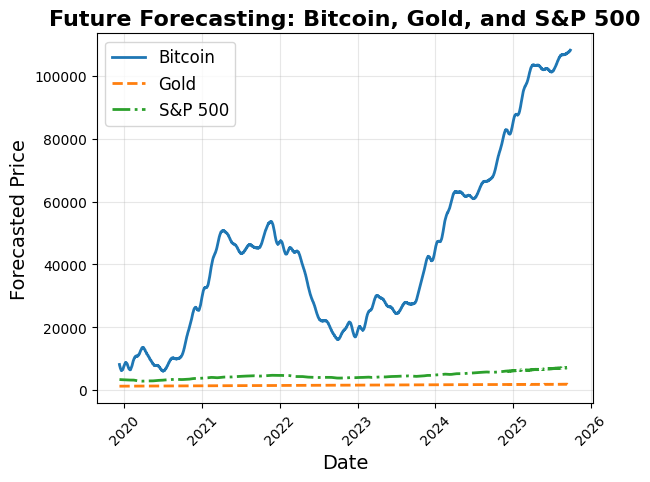

In [11]:
# Plot Bitcoin forecast
plt.plot(forecast_combined['ds'], forecast_combined['Bitcoin Forecast'], label='Bitcoin', linewidth=2)

# Plot Gold forecast
plt.plot(forecast_combined['ds'], forecast_combined['Gold Forecast'], label='Gold', linestyle='--', linewidth=2)

# Plot S&P 500 forecast
plt.plot(forecast_combined['ds'], forecast_combined['S&P 500 Forecast'], label='S&P 500', linestyle='-.', linewidth=2)

# Customize the plot
plt.title("Future Forecasting: Bitcoin, Gold, and S&P 500", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Forecasted Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

# Show the graph
plt.show()

In [15]:
# Drop any values that are blank


# Read in original bitcoin data csv to a dataframe
bitcoin_original_df = pd.read_csv("https://drive.google.com/uc?id=1g_bLlJpB0B9TkPEnTwCmeGlhZVqTOZ5L",
                 index_col="Date",
                 parse_dates=True,
                 thousands=',' # Add thousands separator to handle commas in numbers
                )

# Create a new column in the bitcoin_original_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
bitcoin_original_df['Stock Volatility'] = bitcoin_original_df['Price'].rolling(window=4).std()
bitcoin_original_df.head()

,Price,Open,High,Low,Vol.,Change %,Stock Volatility
Date,,,,,,,
2024-12-09,97359.4,101129.7,101198.6,94395.8,321.01K,-3.72%,NaN
2024-12-08,101115.8,99837.0,101339.9,98713.9,128.93K,1.28%,NaN
2024-12-07,99837.0,99757.2,100441.8,98969.0,118.44K,0.08%,NaN
2024-12-06,99760.7,96968.9,101908.5,96452.0,213.49K,2.88%,1567.714141
2024-12-05,96970.8,98624.8,103719.4,92510.4,245.79K,-1.69%,1747.787091


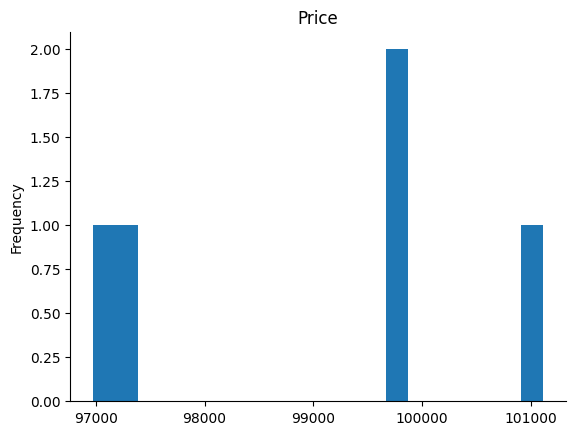

In [16]:
from matplotlib import pyplot as plt
_df_0['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)